### Simple Linear Regression on powerproduction dataset
#### GMIT Fun Data Analysis Project - Brendan Ryan

Firstly what is meant by Regression
The term regression is used when you try to find the relationship between variables.
In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

What is Linear Regression
Linear regression uses the relationship between the data-points to draw a straight line through all them.
This line can be used to predict future values.

i like the way https://www.w3schools.com/python/python_ml_linear_regression.asp simplifies things thank god


## What A Simple Linear Regression Model Is and How It Works:

In statistics, simple linear regression is a linear regression model with a single explanatory variable.  - reference https://en.wikipedia.org/wiki/Simple_linear_regression


####  Simple Linear Regression Model
I found this very useful - https://www.thebalancesmb.com/what-is-simple-linear-regression-2296697
Linear regression models are used to show or predict the relationship between two variables or factors. 
- The factor that is being predicted (the factor that the equation solves for) is called the dependent variable. 
- The factors that are used to predict the value of the dependent variable are called the independent variables.

In linear regression, each observation consists of two values. One value is for the dependent variable and one value is for the independent variable. 

#### In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable


The two factors that are involved in simple linear regression analysis are designated x and y. The equation that describes how y is related to x is known as the regression model.

simple linear regression = we have the points we need to calculate the values for the equation 



### Simple Linear Regression versus Multiple Regression

When two or more independent variables are used in regression analysis, the model is no longer a simple linear one. This is known as multiple regression.

Introduction - a little bit of reaserch etc

Simple Linear Regression – in simple terms fit a straight line to a dataset
Problem electricity generation – sell electricity ahead of time - generate exactly the amount required.  Wind speed Is volatile so need to use predictions etc 
Simple formula for a line Y = mx + c
Does it fit curve better than a straight line – complex linear regression ?


In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading and Cleaning our Dataset

In [2]:
#load in the dataset
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [3]:
#have a look at dataset to make sure everything is ok
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [4]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


Ok so the shape and structure of the dataset looks ok but by using .head and .tail which returns the first and last 5 rows of data it looks like there could be some data recorded in error. Where it may be practical that the power generated at low wind speed may be 0 the power produced at higher wind speed is unlikey to be 0 (althourh issues with turnbines etc may cause this.) Ok lets have a look at our outputs as is and futher on i will calculate our r2 scores with the original and cleaned data.

In [5]:
## to be used further on in project as i woudl prefer to see how the results look with orginal data 
#Delete rows where "Duration" is equal to 0 - https://www.w3schools.com/python/pandas_cleaning_wrong_data.asp
for x in df.index:
  if df.loc[x, "power"] == 0:
    df.drop(x, inplace = True)

In [6]:
#to be used further on
df.head()

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


## Visual Analysis of our Dataset and making some assuptions

In [7]:
#lets have a look at a simple plot

In [8]:
speed = np.array(df["speed"])
power = np.array(df["power"])

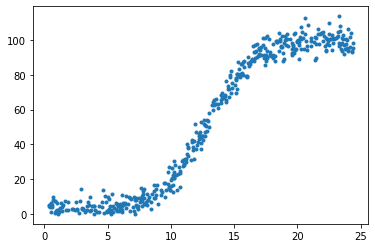

In [9]:
plt.plot(speed,power, ".");
#sns.scatterplot(speed,power);

Ok from above 

## Applying Regression Models to our Data.

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

- How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).
- The value of the dependent variable at a certain value of the independent variable.


- https://en.wikipedia.org/wiki/Curve_fitting
- https://en.wikipedia.org/wiki/Simple_linear_regression

####  Simple Linear Regression using Numpy Polyfit function

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

Numpy has a function named polyfit which can be used to fit lines to many dimensions and attempt to calculate the best fit. We are going to use it here to prove that our dataset does not suit/fit a linear regression model line very well.

In [10]:
#calculate relationship coefficents using numpy 
coeffs = np.polyfit(speed,power,1)
coeffs

array([  5.61882784, -19.83768545])

 forumla for straight line y = a*x + b
4.91759567 is the regression coefficient (the a value) and -13.89990263- is the intercept (the b value).

####  Plotting the best fit line using the values generated from np.ploygits linear regression function

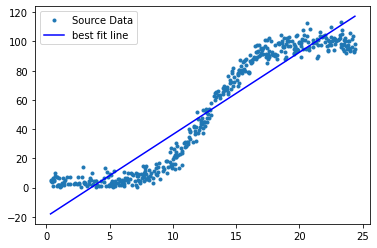

In [11]:
#plot the original data
plt.plot(speed,power, '.', label = "Source Data");
#show the coeffients as as line
plt.plot(speed, coeffs[0] * speed + coeffs[1], "b-", label = "best fit line");# remember y = mx + c equation for straight line 
plt.legend()#show the legend
plt.show()#display the plot
#sns.regplot(data=df, x = "speed", y = "power");
#sns.regplot(speed,power);

Ok so a straight line does not fit this data set very well. It is non linear at low speeds and again at very high speeds.

### Polynominal Regression using numpy

If the data points clearly will not fit a linear regression (a straight line through all data points) as we have shown above is the case in our dataset, it might be ideal for polynomial regression.

Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

Numpy has a function poly1d that will this for u.

Ok lets test this out:

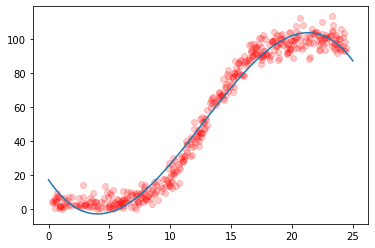

          3         2
-0.04124 x + 1.568 x - 10.63 x + 17.43


In [12]:
speed = np.array(df["speed"])
power = np.array(df["power"])

mymodel = np.poly1d(np.polyfit(speed, power, 3))
line = np.linspace(0, 25, 100)

plt.scatter(speed, power,color='red',alpha=0.2)
plt.plot(line, mymodel(line))
plt.show();
print (mymodel)

Ok as we can see above a not linear regression model fits our dataset better and this model will be better for generating predictions - we will compare both models as we go further on

https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/


Advantages of using Polynomial Regression:

Broad range of function can be fit under it.
Polynomial basically fits wide range of curvature.
Polynomial provides the best approximation of the relationship between dependent and independent variable.
Disadvantages of using Polynomial Regression

These are too sensitive to the outliers.
The presence of one or two outliers in the data can seriously affect the results of a nonlinear analysis.
In addition there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

## Scoring both our models 

insert here the reaserch i have done on teh r2 and pssoble the r values 

In [13]:
#lets core the polfit model - usiing skitlear r2score modules 
#polyfit_score = r2_score()

The purpose of the R-squared value is to measure how much of the variance in $y$ is determined by $x$

The R-squared value emstimates how much of the changes in the $y$ value is due to the changes in the $x$ value compared to all of the other factors affecting the $y$ value. It is calculated as fabove

##### Calculate the R2 score of our Polyfit linear regression using Numpy and Sklearn

In [14]:
#this is to calculate r squared value R2 - coefficent of determination 
ployfit_rsq = np.corrcoef(speed, power)[0][1]**2
#print(r2_score(speed,power))
print(ployfit_rsq)

0.8984832870534452


In [15]:
#https://www.scribbr.com/statistics/simple-linear-regression/
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/  

from sklearn.linear_model import LinearRegression 
lx = df['speed'].values.reshape(-1,1)#reshape to 1 dimensioanl array
ly = df['power'].values.reshape(-1,1)

reg = LinearRegression().fit(lx,ly) #generate regression model
skrq = reg.score(lx,ly) # calcualre the r2 score using sklearn
print(skrq) #print the sklearn r sqaured score

0.8984832870534454


##### Calculate the R2 score of our Polynominal Regression using Numpy.corrcoef and Sklearn r 2 score function

In [16]:
poly1d_rsq = np.corrcoef(mymodel(speed), power)[0][1]**2
print (poly1d_rsq)

0.9783216723216338


In [17]:
from sklearn.metrics import r2_score
print(r2_score(power, mymodel(speed)))

0.9783216723216328


##### Analysing results obtained
- https://www.youtube.com/watch?v=X0lo-TLWPOo

The closer the R2 value is to 1 the more accurate your linear regression model is:

In [18]:
print ("RSquared value using a Polyfit linear regression model is ", ployfit_rsq)
print ("RSquared value using a Polynominal regression model is ", poly1d_rsq)

RSquared value using a Polyfit linear regression model is  0.8984832870534452
RSquared value using a Polynominal regression model is  0.9783216723216338


The above has proven that our Polynominal regression line fits our dataset best and can currently predict 87% of the values in the dataset and with a linear regression model it could predict 72% of the values in the dataset. Both i would assume coudl be used to make predictions but obviously the closer we are to the better the predicitons.

### This is a test section only of sklean linear regression model R as comapred to R2 which are different

In [19]:
#this is for calculating the r value which is correlation coefficent r2 value is Coefficient of determination

from scipy import stats
import scipy.stats
#this is for the r value which is the coeffiecient correlation 
slope, intercept, r, p, std_err = stats.linregress(speed,power)
print(r)

0.947883583069907


###  Evaluating our model train test
Training and Testing - splitting my Data into train and test

To measure if the regression model i created is good enough/test the accuracy , we can use a method called Train/Test.
It is called Train/Test because we split our data set into two sets: a training set and a testing set.

Split into train and test data

In [22]:
## to be used further on in project as i woudl prefer to see how the results look with orginal data 
#Delete rows where "Duration" is equal to 0 - https://www.w3schools.com/python/pandas_cleaning_wrong_data.asp



# not working why ? train test on numpy array
#train_speed = speed[:80]
#train_power = power[:80]

#test_speed = speed[80:]
#test_power = power[80:]
#.values.reshape(-1,1)? need more reashrch on same 



#train_speed = xt[:80]
#train_power = yt[:80]


#test_speed = xt[80:]
#test_power = yt[80:]


#train_x = x[:80]
#train_y = y[:80]
#test_x = x[80:]
#test_y = y[80:]


#plt.scatter(train_speed,train_power);
#plt.scatter(x,y);
#plt.scatter(test_x,test_y)

#x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
#from sklearn.linear_model import LinearRegression

#plt.scatter(train_speed,train_power);
#plt.scatter(x,y);
#plt.scatter(x_test,y_test)


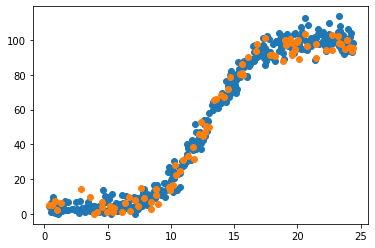

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df['speed']
y = df['power']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #20% FOR TESTING


#plt.scatter(train_speed,train_power);
#plt.scatter(x,y);
#plt.scatter(x_test,y_test);
#DISPLAY THE TRAINING DATA
plt.scatter(x_train,y_train);
plt.scatter(x_test,y_test);

Our training and test data looks similar to original data and can be consisered a fair test

### Plotting our training using Linear Regression and getting the R2 score

In [27]:
#calculate relationship coefficents using numpy 
#coeffst = np.polyfit(x_train,y_train,1)
#coeffst
#plot the original data
#plt.plot(x_train,y_train, '.', label = "Training Data");
#show the coeffients as as line
#plt.plot(x_train, coeffst[0] * y_train + coeffst[1], "b-", label = "best fit line");# remember y = mx + c equation for straight line 
#plt.legend()#show the legend
#plt.show()#display the plot
#sns.regplot(data=df, x = "speed", y = "power");
#sns.regplot(speed,power);

In [28]:
#this is to calculate r squared value R2 - coefficent of determination 
ployfit_train_rsq = np.corrcoef(x_train,y_train)[0][1]**2

In [29]:
#print(r2_score(speed,power))
print(ployfit_train_rsq)## How well does our training data fit a linear regression model ?

0.9035941466272619


### Plotting our training using Polynominal regression and getting the R2 score

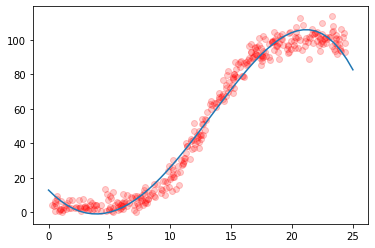

In [40]:
train_model = np.poly1d(np.polyfit(x_train, y_train, 4))
#train_model = np.polyfit(train_speed, train_power, 4)
train_line = np.linspace(0, 25, 50)
plt.scatter(x_train, y_train,color='red',alpha=0.2)
plt.plot(train_line, train_model(train_line))
plt.show();

In [31]:
#poly1d_train_rsq = np.corrcoef(train_model(train_speed), train_power)[0][1]**2
#print (poly1d_train_rsq)
#print(r2_score(train_power, train_model(train_speed)))

In [43]:
poly1d_test_rsq = np.corrcoef(train_model(x_train), y_train)[0][1]**2
print (poly1d_test_rsq)
print(r2_score(y_train, train_model(x_train)))

0.981090890766574
0.9810908907665742


## Making Predictions 

Making predictions with Poly1 d - https://data36.com/linear-regression-in-python-numpy-polyfit/

In [46]:
predict = np.poly1d(train_model)
wind_predict = predict(1)
#print(wind_predict)

predict2 = train_model(20)
print (predict2)

104.16436954717828


In [ ]:
### Testomg from lectures videos 

#a,m,n,t = 2011.1, 2.6650, 622.922, 1.4090

#u = np.linspace(0.0,30.0,1000)

#P_u = a * (1.0 + m * np.exp(-s/t)) / (1.0 + n * np.exp (-s / t))
#df['test'] = P_u
#sns.scatterplot(data=df, x = "speed", y = "power");
sns.scatterplot(speed,power);

### Compare with K Nearest Neighbours Regression

w3s schools regresion 

## Using Sklearn for Predictions

wcs schools very good tutorials 

References 

https://towardsdatascience.com/how-we-made-profits-forecasting-wind-energy-production-levels-b93bd3a7f1ed

https://data36.com/linear-regression-in-python-numpy-polyfit/

https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

https://win-vector.com/2013/02/22/dont-use-correlation-to-track-prediction-performance/

https://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-is-the-difference-between-coefficient-of-determination-and-coefficient-of-correlation/